In [35]:
import pandas as pd
import random
import copy
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('/home/ignis/Downloads/kmeans.csv')

In [37]:
df

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2
5,5.0,3.0
6,4.9,3.1
7,6.7,3.1
8,5.1,3.8
9,6.0,3.0


In [38]:
X = df.to_numpy()

In [39]:
k = 3

In [40]:
type(X)
X

array([[5.9, 3.2],
       [4.6, 2.9],
       [6.2, 2.8],
       [4.7, 3.2],
       [5.5, 4.2],
       [5. , 3. ],
       [4.9, 3.1],
       [6.7, 3.1],
       [5.1, 3.8],
       [6. , 3. ]])

In [41]:
oldCentroid = [[0, 0]] * k
centroid=[[6.2,3.2],[6.6,3.7],[6.5,3.0]]

centroid=np.array(centroid) 
oldCentroid=np.array(oldCentroid)

type(centroid)
type(oldCentroid)


numpy.ndarray

In [42]:
type(centroid)

numpy.ndarray

In [43]:
oldCentroid

array([[0, 0],
       [0, 0],
       [0, 0]])

In [44]:
cluster=[0]*len(X)

In [45]:
cluster

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
#distance function
def dis(a,b,ax=1):
    return LA.norm(a-b,axis=ax)
    

In [47]:
error = dis(centroid, oldCentroid, None)
print(error)

12.53714481052205


In [48]:
iteration = 0

while error != 0:
    iteration += 1
    for i in range(len(X)):
        distances = dis(X[i], centroid)
        cluster[i] = np.argmin(distances)
    oldCentroid = copy.deepcopy(centroid)
    
    print("Clusters assigned after " + str(iteration) + " iterations are: ")
    print(cluster)
    print("Current Centroid: ")
    print(centroid)
    print("Old Centroid: ")
    print(oldCentroid)
    
    for p in range(k):
        points=[X[j] for j in range((len(X))) if cluster[j]==p]
        centroid[p]=np.mean(points,axis=0)
    
    error = dis(centroid, oldCentroid, None)

Clusters assigned after 1 iterations are: 
[0, 0, 2, 0, 1, 0, 0, 2, 0, 0]
Current Centroid: 
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
Old Centroid: 
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
Clusters assigned after 2 iterations are: 
[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]
Current Centroid: 
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
Old Centroid: 
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
Clusters assigned after 3 iterations are: 
[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]
Current Centroid: 
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Old Centroid: 
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


In [49]:
print(centroid)

[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


In [50]:
print(oldCentroid)

[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


In [51]:
print(cluster)

[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]


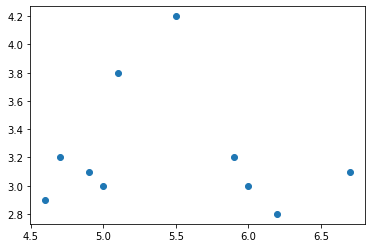

In [52]:
plt.scatter(df['X1'],df['X2'])